In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import yfinance as yf

In [43]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

In [44]:
#### WHERE TO SAVE DATA'
output = "../output/"
figures = "../figures/"	

In [45]:
companies = ["^AEX", "ASML.AS", "AIR","ING", "WKL.AS", "STLA", "AD.AS", "PHG", "^FVX","^TNX", "^TYX"]

combined_Data = []
for i in companies:
    asml1 = yf.Ticker(i)
    hist = asml1.history(period="max")

    #align dates
    stck = pd.DataFrame(hist['Close'])
    stck['newDate'] = stck.index
    stck.index = stck['newDate'].dt.strftime('%Y-%m-%d')
    stck.drop(columns=['newDate'], inplace=True)
    stck.columns = [i]

    combined_Data.append(stck)


In [46]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), combined_Data)
df_merged.index = pd.to_datetime(df_merged.index)
df_merged.tail()

,^AEX,ASML.AS,AIR,ING,WKL.AS,STLA,AD.AS,PHG,^FVX,^TNX,^TYX
newDate,,,,,,,,,,,
2024-11-11,878.289978,627.299988,67.330002,16.030001,162.199997,13.59,32.790001,26.459999,4.195,4.308,4.475
2024-11-12,865.190002,630.299988,67.860001,15.720000,159.750000,13.30,32.160000,25.959999,4.314,4.432,4.577
2024-11-13,862.979980,627.700012,68.320000,15.380000,158.600006,13.12,32.150002,25.959999,4.301,4.451,4.637
2024-11-14,874.479980,671.599976,67.050003,15.480000,158.899994,13.37,32.349998,25.740000,4.292,4.418,4.583
2024-11-15,862.500000,635.000000,66.150002,15.740000,151.649994,13.34,32.130001,25.840000,4.298,4.428,4.601


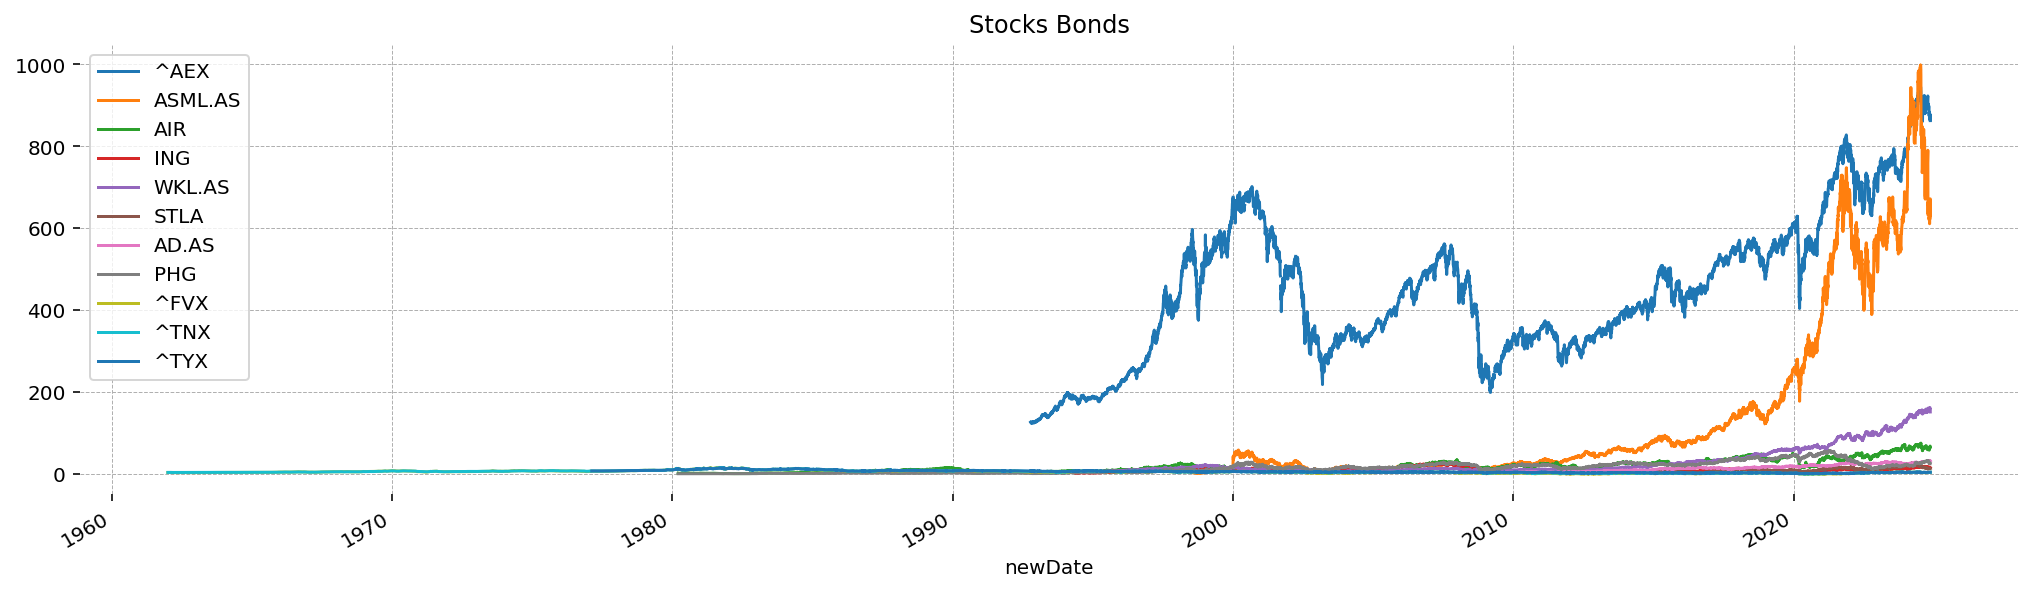

In [47]:

df_merged.plot(title='Stocks Bonds', grid=True);

In [48]:
aex_monthly = df_merged.resample('1MS').mean()
aex_monthly = aex_monthly.loc["1995-01-01":,]

aex_monthly.to_csv(output + "aex_stocks_bonds_mo.csv")